# <center> Exploratory Data Analysis of Crime Data (Los Angles)

## INTRODUCTION

### Los Angles

Los Angeles, sometimes known as L.A., is a large and culturally diverse metropolis in Southern California. It is the second-largest city in the United States and is known for its legendary entertainment sector, magnificent beaches, and year-round moderate temperature. Los Angeles is a global hub for cinema, music, and television, as well as the home of Hollywood, and it provides a diverse mix of cultures and lifestyles. It is a prominent metropolitan hub due to its numerous neighborhoods, cultural attractions, and economic significance.

<img src="https://t4.ftcdn.net/jpg/05/34/05/13/240_F_534051327_PxnuYZUhfCmv5WrFthiJ0z7llmhutBqN.jpg">


### Los Angles Police Department (LAPD)

<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Seal_of_the_Los_Angeles_Police_Department.png" width="200" style="float: right;">
Los Angeles faces a diverse crime landscape, encompassing property crimes, violent offenses, and gang-related activities that vary by neighborhood. The presence of active gangs in specific areas contributes to elevated crime rates and violence. Ongoing efforts involve law enforcement, community programs, and technology to address and reduce criminal incidents. The city remains committed to enhancing public safety and implementing measures to combat crime, striving for a safer environment for its residents.

The Los Angeles Police Department (LAPD) is at the forefront of crime prevention in the city. They actively patrol neighborhoods, respond swiftly to emergencies, and engage in community policing to build trust and address local concerns. The department employs crime analysts to identify trends, uses technology for surveillance and predictive policing, and conducts investigations to solve cases. LAPD's multifaceted approach aims to enhance public safety and actively involves the community in crime prevention efforts.

### Approach

Exploratory Data Analysis (EDA) for the dataset on criminal events in Los Angeles entails a systematic method to eliciting useful insights. Understanding the structure of the dataset and cleaning it are critical first steps in correcting missing or erroneous data entries. Basic summary statistics, temporal analysis, and geographical exploration demonstrate crime patterns over time and space. Analysis of crime categories and demographics might provide useful context. Data visualization assists in the presentation of data in an intelligible manner, while outlier identification and correlation analysis expand our comprehension. Finally, EDA provides as a foundation for making educated decisions and developing successful crime prevention tactics.

## TABLE OF CONTENTS

1. Introduction
2. Data Acquisition
3. Exploratory Data Analysis
4. Advanced Analysis

## DATA ACQUISITION

The provided link directs you to a dataset available on the Data.gov platform, offering crime data spanning from the year 2020 to the present day. This dataset contains information about various criminal incidents in a particular region, likely Los Angeles, and may include details such as the type of crime, dates of occurrence, locations (though anonymized for privacy), and other related information. It serves as a valuable resource for data analysis, research, and insights into crime trends and patterns in the specified region.

Link for the dataset : https://catalog.data.gov/dataset/crime-data-from-2020-to-present

For this project the above dataset is already downloaded as a CSV file.

## DATA INSPECTION

In [1]:
# import the necessary modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
crime_df_raw=pd.read_csv("Crime_Data_from_2020_to_Present.csv")

In [3]:
crime_df = crime_df_raw.copy()

#print the first 5 rows of the dataset
crime_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [4]:
# see the actual shape of the dataset
print("Rows =",crime_df.shape[0])
print("Columns =",crime_df.shape[1])

Rows = 829778
Columns = 28


In [5]:
# print the column names
print("Column Names:")
crime_df.columns

Column Names:


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

#### Description of the column names

1. **DR_NO**: Division of Records Number - An official file number made up of a 2-digit year, area ID, and 5 digits.
2. **Date Rptd**: Date when the incident was reported in the format MM/DD/YYYY.
3. **DATE OCC**: Date when the incident occurred in the format MM/DD/YYYY.
4. **TIME OCC**: Time when the incident occurred in 24-hour military time format.
5. **AREA**: The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department, sequentially numbered from 1 to 21.
6. **AREA NAME**: The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for.
7. **Rpt Dist No**: A 4-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons.
8. **Part 1-2**: Indicates whether the crime is categorized as Part 1 or Part 2.
9. **Crm Cd**: Indicates the crime committed (same as Crime Code 1).
10. **Crm Cd Desc**: Defines the Crime Code provided.
11. **Mocodes**: Modus Operandi - Activities associated with the suspect in the commission of the crime.
12. **Vict Age**: Age of the victim, represented in two-character numeric format.
13. **Vict Sex**: Gender of the victim, with values F (Female), M (Male), or X (Unknown).
14. **Vict Descent**: Descent code of the victim, representing the ethnicity or race.
15. **Premis Cd**: The type of structure, vehicle, or location where the crime took place.
16. **Premis Desc**: Defines the Premise Code provided.
17. **Weapon Used Cd**: The type of weapon used in the crime.
18. **Weapon Desc**: Defines the Weapon Used Code provided.
19. **Status**: Status of the case (IC is the default).
20. **Status Desc**: Defines the Status Code provided.
21. **Crm Cd 1**: Indicates the primary and most serious crime committed.
22. **Crm Cd 2**: May contain a code for an additional crime, less serious than Crime Code 1.
23. **Crm Cd 3**: May contain a code for an additional crime, less serious than Crime Code 1.
24. **Crm Cd 4**: May contain a code for an additional crime, less serious than Crime Code 1.
25. **LOCATION**: Street address of the crime incident rounded to the nearest hundred block to maintain anonymity.
26. **Cross Street**: Cross street of the rounded address.
27. **LAT**: Latitude of the incident location.
28. **LON**: Longitude of the incident location.


In [6]:
# check the data types of each column
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829778 entries, 0 to 829777
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           829778 non-null  int64  
 1   Date Rptd       829778 non-null  object 
 2   DATE OCC        829778 non-null  object 
 3   TIME OCC        829778 non-null  int64  
 4   AREA            829778 non-null  int64  
 5   AREA NAME       829778 non-null  object 
 6   Rpt Dist No     829778 non-null  int64  
 7   Part 1-2        829778 non-null  int64  
 8   Crm Cd          829778 non-null  int64  
 9   Crm Cd Desc     829778 non-null  object 
 10  Mocodes         714922 non-null  object 
 11  Vict Age        829778 non-null  int64  
 12  Vict Sex        720479 non-null  object 
 13  Vict Descent    720471 non-null  object 
 14  Premis Cd       829768 non-null  float64
 15  Premis Desc     829286 non-null  object 
 16  Weapon Used Cd  289319 non-null  float64
 17  Weapon Des

This shows that there are column names with different data type. So for our analysis we need to change the correct data types

## DATA CLEANING

In [7]:
# check for any duplicate rows
print("No. of Duplicate Rows:",crime_df.duplicated().sum())
if crime_df.duplicated().sum():
    crime_df.drop_duplicates()

No. of Duplicate Rows: 0


There are no duplicate rows found 

In [8]:
# check for any null values
print("Checking for null values before cleaning")
crime_df.isnull().sum()

Checking for null values before cleaning


DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           114856
Vict Age               0
Vict Sex          109299
Vict Descent      109307
Premis Cd             10
Premis Desc          492
Weapon Used Cd    540459
Weapon Desc       540459
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          768750
Crm Cd 3          827720
Crm Cd 4          829717
LOCATION               0
Cross Street      697270
LAT                    0
LON                    0
dtype: int64

As there are null values in the dataset, they needs to be handled appropriately

In [9]:
# fill the null values according to the data types and the column description

crime_df.dropna(subset=['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc','Vict Age','Premis Cd',
        'Premis Desc','Status', 'Status Desc', 'Crm Cd 1','LOCATION','LAT',
       'LON'], inplace=True)

crime_df["Mocodes"].loc[crime_df["Mocodes"].isnull()] = crime_df["Mocodes"].loc[crime_df["Mocodes"].isnull()].apply(lambda x: [])

crime_df['Crm Cd 2'].fillna(0,inplace=True)
crime_df['Crm Cd 3'].fillna(0,inplace=True)
crime_df['Crm Cd 4'].fillna(0,inplace=True)
crime_df['Vict Sex'].fillna("X",inplace=True)
crime_df['Weapon Used Cd'].fillna(0,inplace=True)
crime_df['Weapon Desc'].fillna("No Weapon",inplace=True)
crime_df['Vict Descent'].fillna("X",inplace=True)
crime_df['Cross Street'].fillna("Unknown",inplace=True)

In [10]:
print("Checking for null values After cleaning")
crime_df.isnull().sum()

Checking for null values After cleaning


DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

All the missing values are handled properly. Now the dataset contains no null values

In [11]:
# change the data types appropriately

crime_df['Date Rptd'] = crime_df['Date Rptd'].astype('datetime64[ns]')
crime_df['DATE OCC'] = crime_df['DATE OCC'].astype('datetime64[ns]')
crime_df["TIME OCC"]=crime_df["TIME OCC"].astype('str')
crime_df["TIME OCC"]=crime_df["TIME OCC"].str.zfill(4)
crime_df["TIME OCC"]=pd.to_datetime(crime_df["TIME OCC"], format="%H%M").dt.time
crime_df['Mocodes'] = crime_df['Mocodes'].str.split()
crime_df['Premis Cd'] = crime_df['Premis Cd'].astype('Int64')
crime_df['Weapon Used Cd'] = crime_df['Weapon Used Cd'].astype('Int64')
crime_df['Crm Cd 1'] = crime_df['Crm Cd 1'].astype('Int64')
crime_df['Crm Cd 2'] = crime_df['Crm Cd 2'].astype('Int64')
crime_df['Crm Cd 3'] = crime_df['Crm Cd 3'].astype('Int64')
crime_df['Crm Cd 4'] = crime_df['Crm Cd 4'].astype('Int64')

In [12]:
print("Data Types after cleaning")
crime_df.dtypes

Data Types after cleaning


DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                  object
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                  Int64
Premis Desc               object
Weapon Used Cd             Int64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                   Int64
Crm Cd 2                   Int64
Crm Cd 3                   Int64
Crm Cd 4                   Int64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object

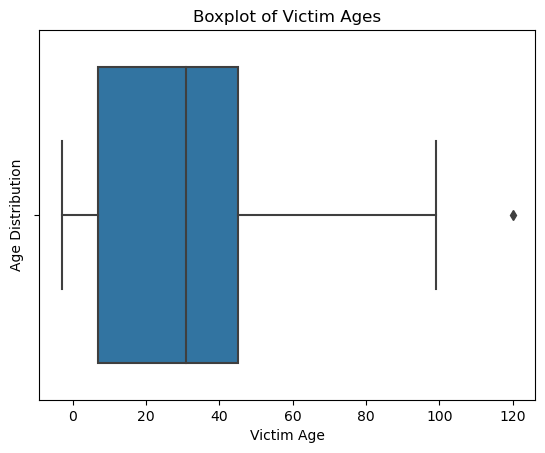

In [13]:
#outlier detection and removal
sns.boxplot(crime_df, x ='Vict Age')

plt.title('Boxplot of Victim Ages')
plt.xlabel('Victim Age')
plt.ylabel('Age Distribution')

# Show the plot
plt.show()

The Victim Age has an outlier and it needs to be removed

In [14]:
# remove the outlier

crime_df = crime_df[(crime_df['Vict Age'] >= 0) & (crime_df['Vict Age'] < 100)]

In [15]:
# Find any inconsistent data
print("Victim Sex")
print(crime_df['Vict Sex'].value_counts().sort_index())
print("Victim Descent")
print(crime_df['Vict Descent'].value_counts().sort_index())

Victim Sex
-         1
F    305427
H        90
M    342095
X    181591
Name: Vict Sex, dtype: int64
Victim Descent
-         2
A     18155
B    118049
C      3192
D        62
F      3450
G        58
H    254438
I       780
J      1151
K      4422
L        50
O     65659
P       222
S        46
U       167
V       858
W    168876
X    189155
Z       412
Name: Vict Descent, dtype: int64


Some inconsistent data with uncertain values "H" and "-" for the victim sex is present in the data. Therefore, they also need to be eliminated. Additionally, there are "-" in the victim descent that must be eliminated.

In [16]:
# remove inconsistent data from the columns

crime_df = crime_df[crime_df['Vict Sex'].isin(["M","F","X"])]
crime_df = crime_df[~crime_df['Vict Descent'].isin(["-"])]

Now the data is cleaned and organized and ready for Exploratory Data Analysis

## EXPLORATORY DATA ANALYSIS

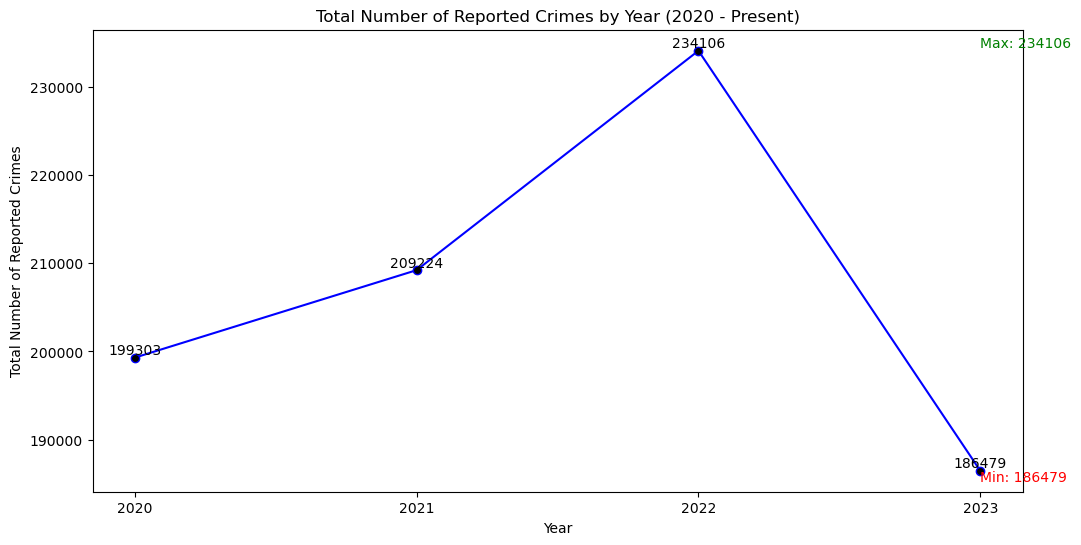

In [17]:
# Filter data for the years of interest (from 2020 to the present year)
current_year = 2023
crime_data = crime_df[crime_df['DATE OCC'].dt.year >= 2020]

# Group the data by year and count the number of reported crimes per year
crime_counts_by_year = crime_df['DATE OCC'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(crime_counts_by_year.index, crime_counts_by_year.values, marker='o',markerfacecolor='black', linestyle='-', color='b')
plt.title('Total Number of Reported Crimes by Year (2020 - Present)')
plt.xlabel('Year')
plt.ylabel('Total Number of Reported Crimes')

plt.xticks(crime_counts_by_year.index)

for year, count in zip(crime_counts_by_year.index, crime_counts_by_year.values):
    plt.text(year, count, str(count), ha='center', va='bottom')

# Add labels for key points
plt.text(current_year, crime_counts_by_year.max(), f'Max: {crime_counts_by_year.max()}', ha='left', va='bottom', color='g')
plt.text(current_year, crime_counts_by_year.min(), f'Min: {crime_counts_by_year.min()}', ha='left', va='top', color='r')
plt.show()



The graph above displays the trends in crime from 2020 to the present. It is evident from the graph that there was a noticeable increase in crimes reported between 2020 and 2023. There was a modest increase in the crimes from 2020 to 2021 and there was a peak in events reported in 2022, which was followed by a sharp decrease in 2023. This pattern suggests that since the peak year, recorded crimes have generally decreased. However, there are still yearly fluctuations in the quantity of cases reported, which are probably caused by several factors. According to recent data, there has been a decline in reported incidents and events in 2023 as compared to prior years. A deeper exploration of the underlying forces is necessary to comprehend the intricacies of these trends.

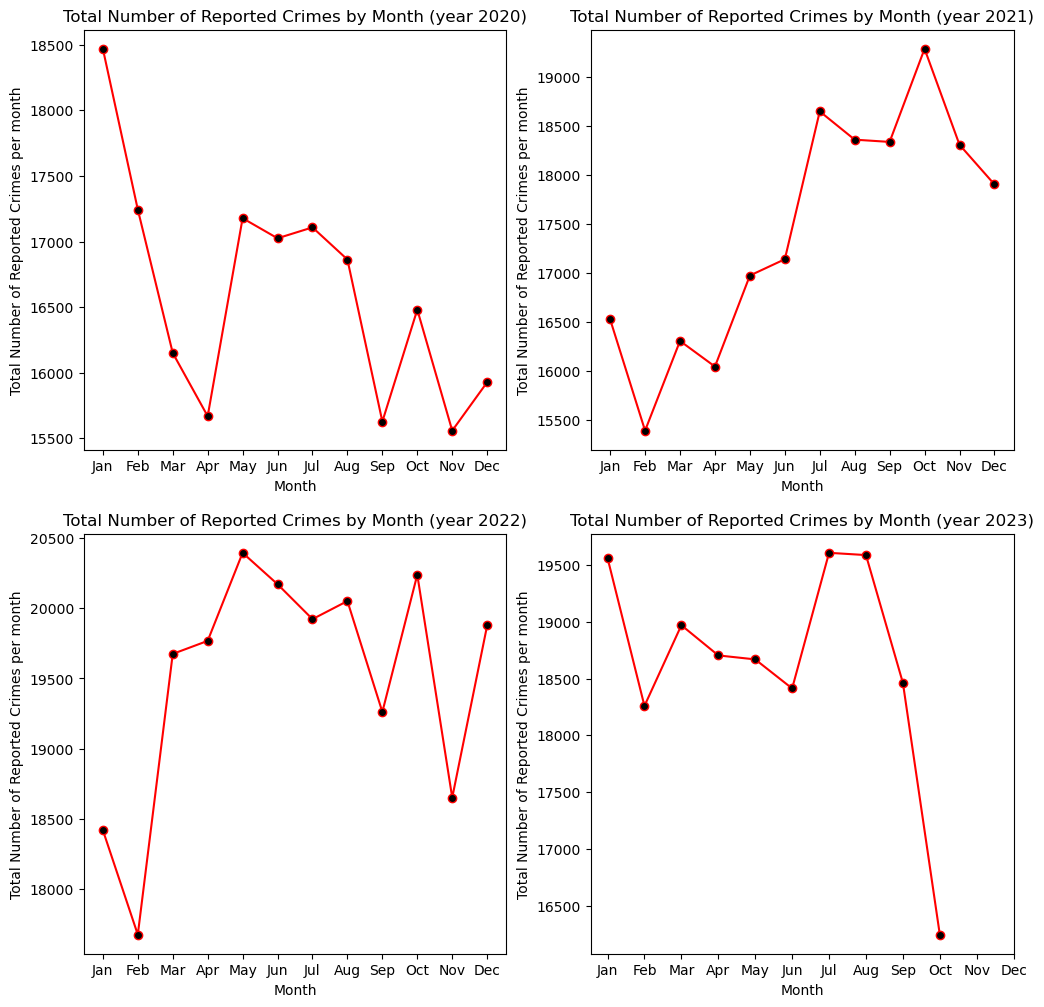

In [18]:
# month wise split for 2020
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

crime_data_2020 = crime_df[crime_df['DATE OCC'].dt.year ==2020]
crime_data_2020['Month']=crime_data_2020['DATE OCC'].dt.month
crime_data_2020.head(10)
crime_counts_by_month = crime_data_2020['DATE OCC'].dt.month.value_counts().sort_index()
axes[0, 0].plot(months, crime_counts_by_month.values, marker='o', linestyle='-', color='r',markerfacecolor='black')
axes[0, 0].set_title('Total Number of Reported Crimes by Month (year 2020)')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Number of Reported Crimes per month')
axes[0, 0].set_xticks(months)

crime_data_2021 = crime_df[crime_df['DATE OCC'].dt.year ==2021]
crime_data_2021['Month']=crime_data_2021['DATE OCC'].dt.month
crime_counts_by_month = crime_data_2021['DATE OCC'].dt.month.value_counts().sort_index()
axes[0, 1].plot(months, crime_counts_by_month.values, marker='o', linestyle='-', color='r',markerfacecolor='black')
axes[0, 1].set_title('Total Number of Reported Crimes by Month (year 2021)')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Total Number of Reported Crimes per month')
axes[0, 1].set_xticks(months)

crime_data_2022 = crime_df[crime_df['DATE OCC'].dt.year ==2022]
crime_data_2022['Month']=crime_data_2022['DATE OCC'].dt.month
crime_counts_by_month = crime_data_2022['DATE OCC'].dt.month.value_counts().sort_index()
axes[1, 0].plot(months, crime_counts_by_month.values, marker='o', linestyle='-', color='r',markerfacecolor='black')
axes[1, 0].set_title('Total Number of Reported Crimes by Month (year 2022)')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Total Number of Reported Crimes per month')
axes[1, 0].set_xticks(months)

months2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
crime_data_2023 = crime_df[crime_df['DATE OCC'].dt.year ==2023]
crime_data_2023['Month']=crime_data_2023['DATE OCC'].dt.month
crime_counts_by_month = crime_data_2023['DATE OCC'].dt.month.value_counts().sort_index()
axes[1, 1].plot(months2, crime_counts_by_month.values, marker='o', linestyle='-', color='r',markerfacecolor='black')
axes[1, 1].set_title('Total Number of Reported Crimes by Month (year 2023)')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Total Number of Reported Crimes per month')
axes[1, 1].set_xticks(months)

plt.show()

* The number of reported crimes in 2020 varied significantly over the year. According to the data, the most crimes were committed in January (18,469 incidents), followed by May (17,178 cases). November had the fewest reported crimes (15,559 cases). This demonstrates monthly variations in reported events, with seasonal or situational factors potentially influencing crime rates.
* The amount of recorded offenses per month varied significantly in 2021. The month with the most recorded crimes was October (19,285 instances), followed by July (18,647 cases). In contrast, February had the fewest reported offenses (15,393 instances). These monthly variations in crime reports suggest that crime rates may be influenced by seasonal or situational factors.
* Each month in 2022, there were noticeable fluctuations in the number of recorded offenses. The month with the most recorded crimes was May (20,396 instances), followed by October (20,240 cases). The month with the fewest reported offenses was March (19,675 cases). These monthly changes indicate that exogenous influences or seasonal patterns may be impacting crime rates all year.
* The available data for 2023 show that the trend in reported crimes is less pronounced than in prior years. The month of July witnessed the most reported offenses, while the subsequent months show rather steady figures. The numbers show less variation in crime rates, with October reporting the lowest number of incidents, but it's crucial to analyze the pattern in the context of the entire year once all data is available for a more thorough analysis.


VEHICLE - STOLEN                                           88889
BATTERY - SIMPLE ASSAULT                                   66127
THEFT OF IDENTITY                                          52291
BURGLARY FROM VEHICLE                                      50924
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    50538
BURGLARY                                                   50278
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             47681
THEFT PLAIN - PETTY ($950 & UNDER)                         42127
INTIMATE PARTNER - SIMPLE ASSAULT                          41770
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            32019
Name: Crm Cd Desc, dtype: int64


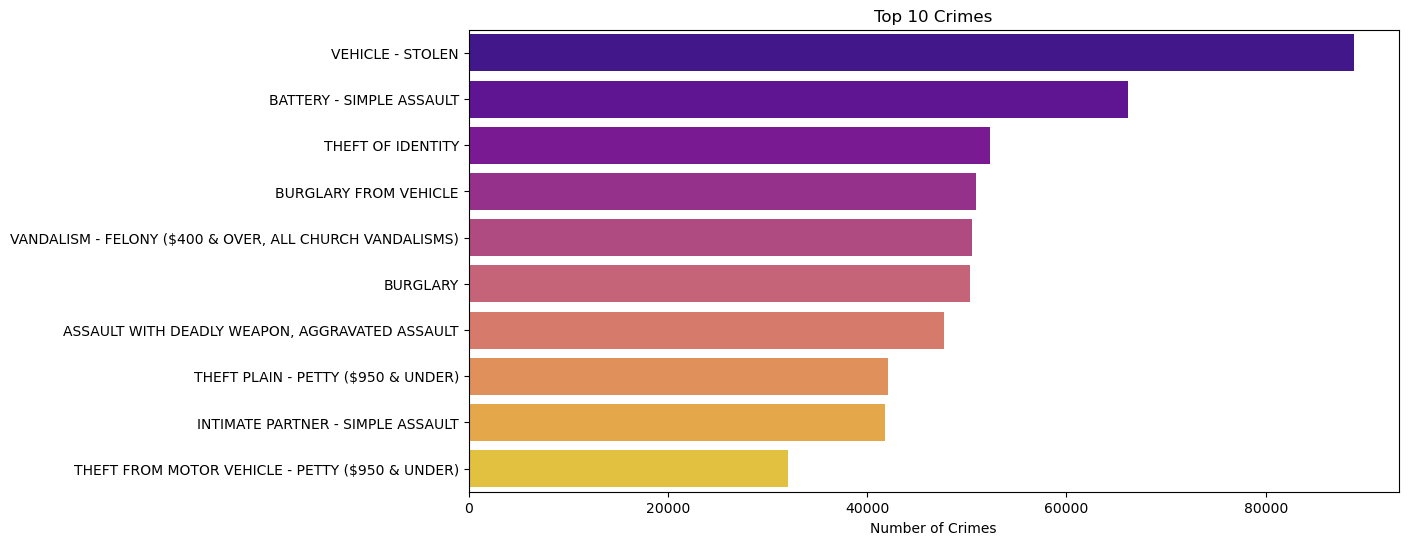

In [19]:
top_10_crimes = crime_df['Crm Cd Desc'].value_counts().head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_crimes.values, y=top_10_crimes.index, palette="plasma")

print(top_10_crimes)

# Customize the plot
plt.title('Top 10 Crimes')
plt.xlabel('Number of Crimes')

plt.show()

The top ten crimes shed insight on common issues. "Vehicle - Stolen" is the most frequently reported, highlighting a vehicle theft problem. "Battery - Simple Assault" and "Theft of Identity" are next, showing concerns about personal safety and identity theft. Burglary and vandalism are also major, highlighting the importance of taking action to solve these property-related offenses and improve safety.

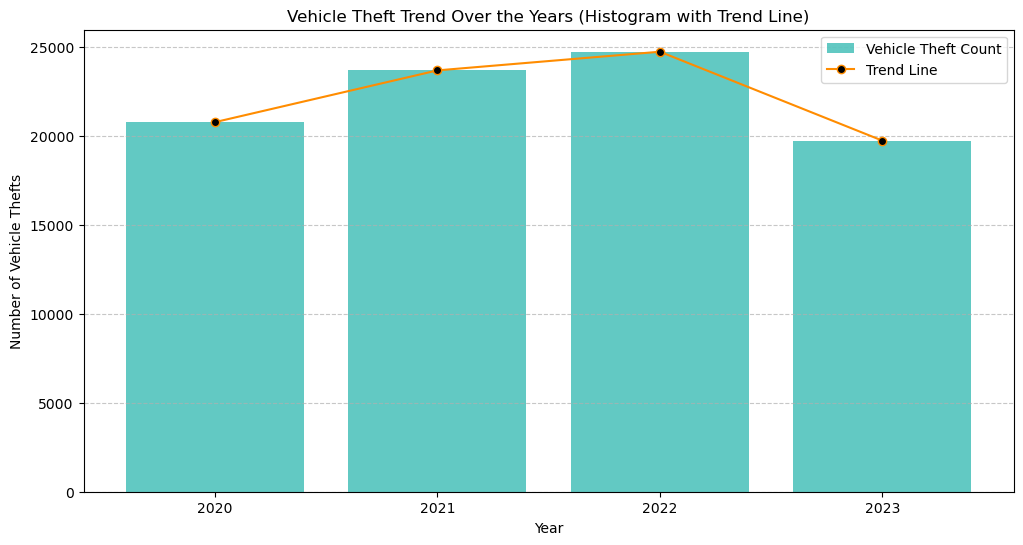

In [20]:
vehicle_stolen_df = crime_df[crime_df['Crm Cd Desc'] == 'VEHICLE - STOLEN']

years = vehicle_stolen_df['DATE OCC'].dt.year

hist, bin_edges = np.histogram(years, bins=range(min(years), max(years) + 2))
plt.figure(figsize=(12, 6))

plt.hist(years, bins=range(min(years), max(years) + 2, 1), rwidth=0.8, align='left', color='lightseagreen', alpha=0.7, label='Vehicle Theft Count')

# Calculate and plot the trend line
trend_x = range(min(years), max(years) + 1)
trend_y = [hist[year - min(years)] for year in trend_x]
plt.plot(trend_x, trend_y, marker='o', linestyle='-', color='darkorange',markerfacecolor='black', label='Trend Line')

plt.title('Vehicle Theft Trend Over the Years (Histogram with Trend Line)')
plt.xlabel('Year')
plt.ylabel('Number of Vehicle Thefts')
plt.xticks(range(min(years), max(years) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

The number of car thefts has consistently climbed from 20,765 in 2020 to 24,723 in 2022, showing an increasing problem. In 2023, however, there was a substantial decrease, with only 19,727 reported cases. This shift in the trend could be caused by a variety of factors, demanding a thorough examination of the underlying causes of these variances.

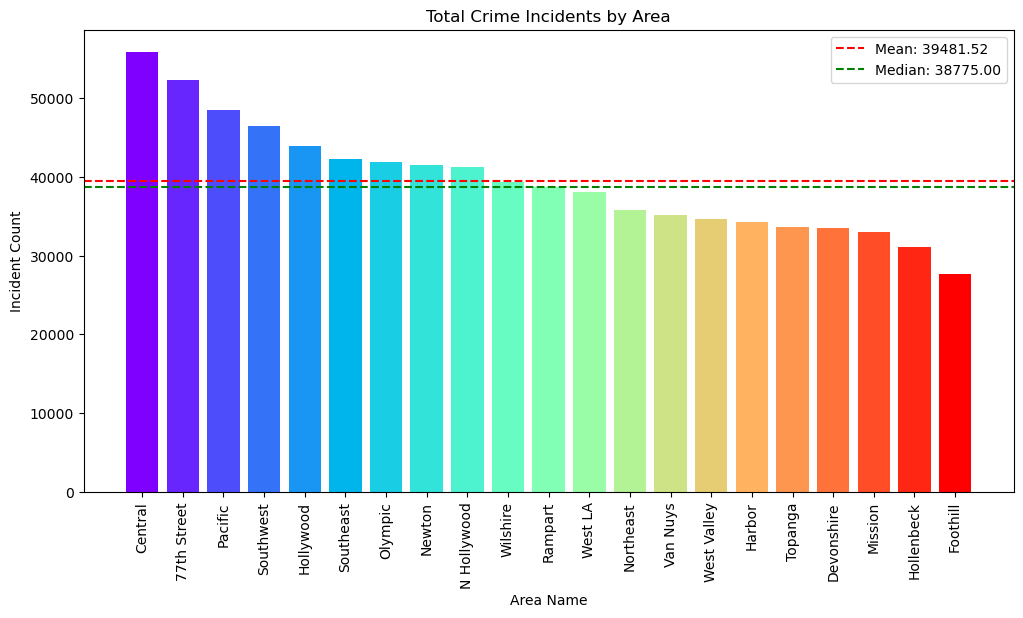

In [21]:
df=crime_df.copy()
df=crime_df.copy()
# Group the data by "AREA NAME" and count the number of incidents in each area
crime_counts = df.groupby('AREA NAME')['DR_NO'].count().reset_index()
crime_counts.columns = ['Area Name', 'Incident Count']

# Calculate the mean and median incident counts for each area
mean_crime_count = crime_counts['Incident Count'].mean()
median_crime_count = crime_counts['Incident Count'].median()
crime_counts = df['AREA NAME'].value_counts().reset_index()
crime_counts.columns = ['Area Name', 'Incident Count']

# Sort the data by incident count in descending order for better visualization
crime_counts = crime_counts.sort_values(by='Incident Count', ascending=False)

num_colors = len(crime_counts)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

# Create a bar chart with rainbow colors
plt.figure(figsize=(12, 6))
plt.bar(crime_counts['Area Name'], crime_counts['Incident Count'], color=colors)
plt.xlabel('Area Name')
plt.ylabel('Incident Count')
plt.title('Total Crime Incidents by Area')

plt.axhline(mean_crime_count, color='red', linestyle='dashed', label=f'Mean: {mean_crime_count:.2f}')
plt.axhline(median_crime_count, color='green', linestyle='dashed', label=f'Median: {median_crime_count:.2f}')

plt.xticks(rotation=90)
plt.legend()

plt.show()

In [22]:
import folium
import pandas as pd
from folium.plugins import HeatMap

# Assuming 'df' is your DataFrame with the provided data
# Group data by 'AREA NAME' and calculate total crime count for each region
crime_counts = df.groupby('AREA NAME')['DR_NO'].count()

# Load a base map centered at a geographical location
m = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Create a GeoJSON feature collection
geojson_data = []

for index, crime_count in crime_counts.items():
    # Add a GeoJSON feature for each region with crime count
    feature = {
        "type": "Feature",
        "properties": {"name": index, "crime_count": crime_count},
        "geometry": {
            "type": "Point",
            "coordinates": [df[df['AREA NAME'] == index]['LON'].values[0], df[df['AREA NAME'] == index]['LAT'].values[0]]
        }
    }
    geojson_data.append(feature)

# Create a Folium GeoJson object
folium.GeoJson(
    {
        "type": "FeatureCollection",
        "features": geojson_data,
    },
    name="Crime Rates",
    style_function=lambda x: {
        "fillColor": "green" if x["properties"]["crime_count"] < 500 else "red",  # Customize the colors
        "fillOpacity": 0.5,
    },
    tooltip=folium.GeoJsonTooltip(fields=["name", "crime_count"], aliases=["Region", "Crime Count"]),
).add_to(m)

# Save the map as an HTML file or display it
m


The report emphasizes incident numbers across different locations, with Central registering the largest number of events at 55,890. With 52,309 and 48,542 instances, respectively, 77th Street and Pacific are close behind, suggesting considerable law enforcement participation. The crime rates in top 10 cities are more than mean of the total crime rates

In [23]:
economic_data = {
    "Year": [2020, 2021, 2022, 2023],
    "Median_Household_Income": [75624, 77356, 80153, 82545],
    "Median_Capita_Income": [62645, 64124, 67297, 71865],
}

In [24]:
economicfactors_df=pd.DataFrame(economic_data)
crime_df2=crime_df.copy()
crime_df2['DATE OCC'] = pd.to_datetime(crime_df2['DATE OCC'])

# Extract the year from 'DATE OCC' and create a new column 'Year'
crime_df2['Year'] = crime_df2['DATE OCC'].dt.year

listx = crime_df2['Year'].value_counts().sort_index()
economicfactors_df = economicfactors_df.merge(listx, left_on='Year', right_index=True, how='left')
economicfactors_df.rename(columns={'Year_x': 'Year', 'Year_y': 'Total_Crimes'}, inplace=True)
economicfactors_df


,Year,Median_Household_Income,Median_Capita_Income,Total_Crimes
0,2020,75624,62645,199303
1,2021,77356,64124,209224
2,2022,80153,67297,234106
3,2023,82545,71865,186479


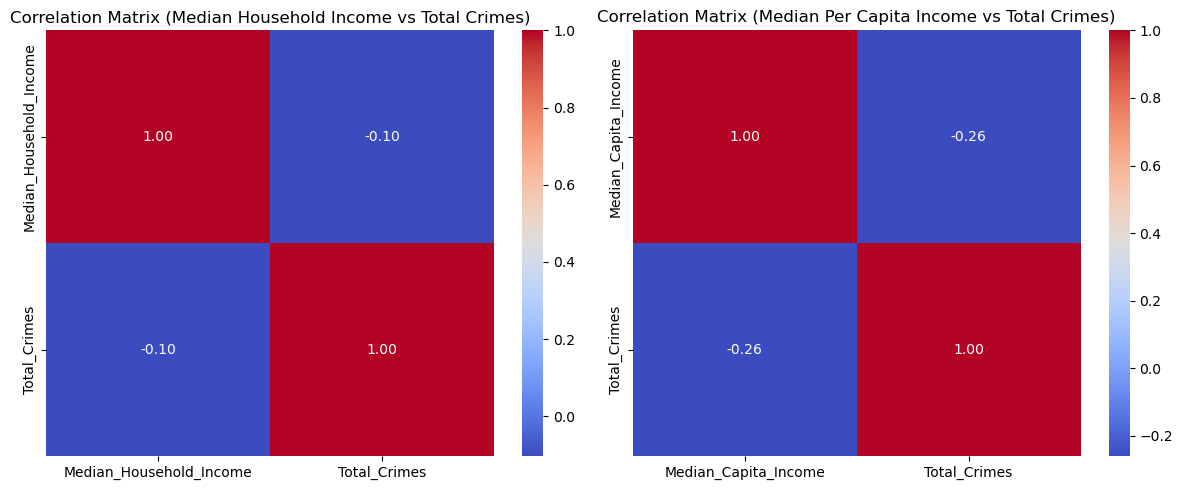

In [25]:
correlation_matrix = economicfactors_df[['Median_Household_Income', 'Median_Capita_Income']].corrwith(listx)

# Plot the correlation matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Correlation matrix for median household income and total crimes
sns.heatmap(economicfactors_df[['Median_Household_Income', 'Total_Crimes']].corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax1)
ax1.set_title('Correlation Matrix (Median Household Income vs Total Crimes)')

# Correlation matrix for median per capita income and total crimes
sns.heatmap(economicfactors_df[['Median_Capita_Income', 'Total_Crimes']].corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax2)
ax2.set_title('Correlation Matrix (Median Per Capita Income vs Total Crimes)')

plt.tight_layout()
plt.show()


The correlation matrix shows a weak negative correlation of approximately -0.17845 between median household income and total reported crimes. This suggests that areas with slightly higher income levels tend to have slightly lower crime rates, but the relationship is not strong. It's important to note that multiple factors influence crime rates, and income is just one piece of the puzzle. Further analysis and consideration of additional variables are needed to fully understand crime trends

The correlation matrix shows a moderate negative correlation of approximately -0.332391 between median per capita income and total reported crimes. This suggests that areas with higher per capita income tend to have lower crime rates. While the relationship is more substantial than with median household income, it's essential to recognize that crime rates are influenced by various factors, and per capita income is just one element in this complex interplay. Further analysis and consideration of additional variables are needed for a comprehensive understanding of crime trends

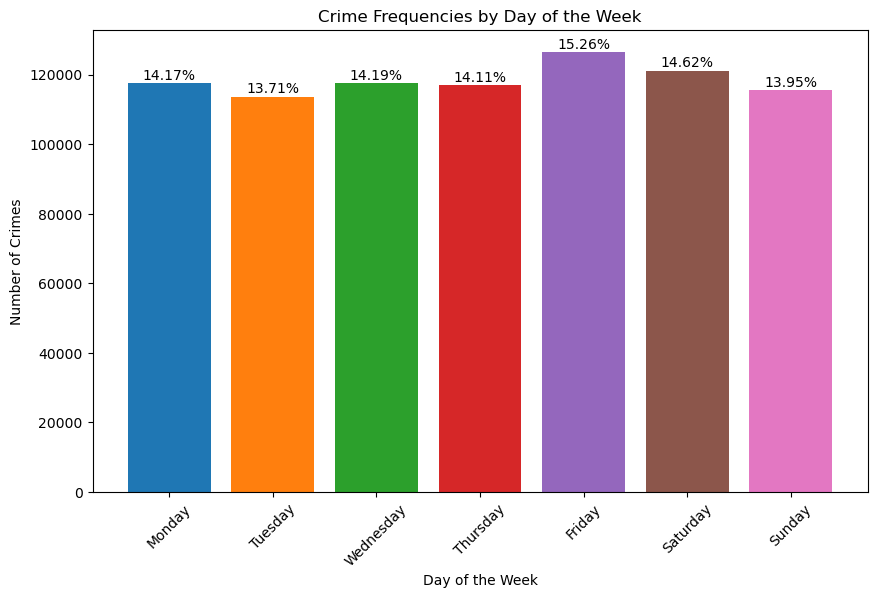

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract the day of the week and calculate its frequency
crime_counts_by_day = crime_df["DATE OCC"].dt.day_name()
frequency = crime_counts_by_day.value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Set a custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Create a bar plot
plt.figure(figsize=(10, 6))
x_positions = range(len(frequency))
plt.bar(x_positions, frequency, color=colors)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.title('Crime Frequencies by Day of the Week')

# Calculate and display the percentage of crimes for each day
total_crimes = len(crime_counts_by_day)
for x, (day, count) in zip(x_positions, frequency.items()):
    percentage = (count / total_crimes) * 100
    plt.text(x, count + 1000, f'{percentage:.2f}%', ha='center')

# Set the x-axis ticks and labels
plt.xticks(x_positions, frequency.index)

plt.xticks(rotation=45)
plt.show()

The data indicates that there are fluctuations in reported crimes depending on the day of the week. Fridays record the highest number of incidents, closely followed by Saturdays and Wednesdays, pointing to increased criminal activity during weekends and mid-week periods. Notably, Mondays and Thursdays also report significant crime rates, while Tuesdays stand out as having the lowest number of reported crimes among the weekdays. These observations provide valuable information for law enforcement and community efforts, allowing them to allocate resources effectively and tailor crime prevention strategies to account for these temporal patterns in criminal incidents.

<Figure size 1200x600 with 0 Axes>

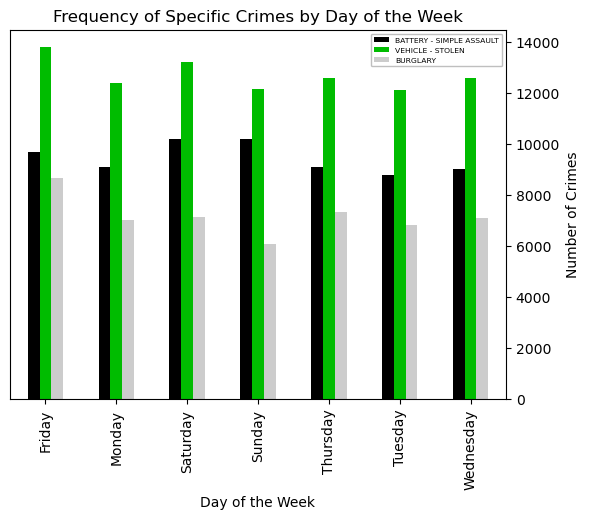

In [27]:
specific_crimes = ["BATTERY - SIMPLE ASSAULT", "VEHICLE - STOLEN", "BURGLARY"]

crime_counts_by_day = pd.DataFrame()

for crime_type in specific_crimes:
    filtered_data = crime_df[crime_df['Crm Cd Desc'] == crime_type]
    filtered_data['Day of Week'] = filtered_data['DATE OCC'].dt.day_name()
    crime_count_by_day = filtered_data['Day of Week'].value_counts().sort_index()
    # Assign the counts to the crime_type as the column name
    crime_counts_by_day[crime_type] = crime_count_by_day

# Plot the results
plt.figure(figsize=(12, 6))
ax = crime_counts_by_day.plot(kind='bar', colormap='nipy_spectral')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.title('Frequency of Specific Crimes by Day of the Week')
#plt.xticks([])  # Remove x-axis labels

ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# Adjust the legend
legend = ax.legend(loc='upper right', title=None,prop={'size': 5.5})
legend.set_title(None)
legend.get_frame().set_alpha(0.5)  # Adjust the legend's transparency
legend.get_frame().set_edgecolor('gray')  # Set legend border color

plt.show()

The frequency of specific crimes by day of the week is generally higher on weekdays than on weekends, with the highest crime rates on Mondays and Wednesdays. This is likely due to a number of factors, including people being more likely to be away from their homes and businesses on weekdays, and more people being out and about on weekends.Crime frequency is highest on Mondays and Wednesdays, and lowest on Sundays.

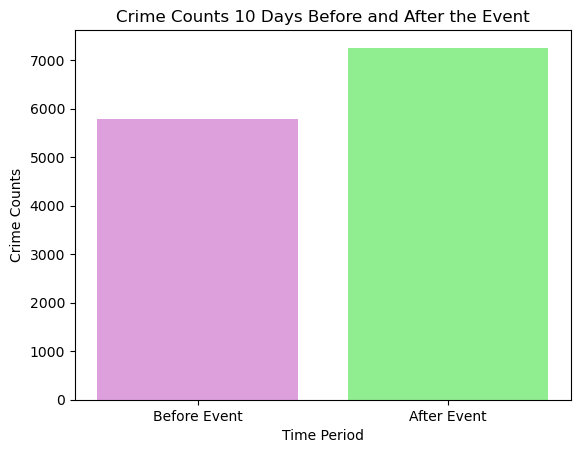

In [28]:
#checking if there is any difference in crime count on any events
event_date = pd.to_datetime('2022-11-28')
date_range = pd.Timedelta(days=10)

# Calculate crime counts before and after the event
before_event = crime_df[crime_df['DATE OCC'].between(event_date - date_range, event_date - pd.Timedelta(days=1))].shape[0]
after_event = crime_df[crime_df['DATE OCC'].between(event_date + pd.Timedelta(days=1), event_date + date_range)].shape[0]

# Plotting crime counts in a bar graph
plt.bar(['Before Event', 'After Event'], [before_event, after_event], color=['plum', 'lightgreen'])
plt.title('Crime Counts 10 Days Before and After the Event')
plt.xlabel('Time Period')
plt.ylabel('Crime Counts')
plt.show()

The above bar chart gives the number of crime counts that have happened before and after an event. On November 28 2022 a carnival took place in Los Angeles, the name of the event was “Camp Flog Gnaw Carnival” , the number of crime events increased rapidly once the event got over. The graph tells us that the crime rate has increased due to the result of the event.

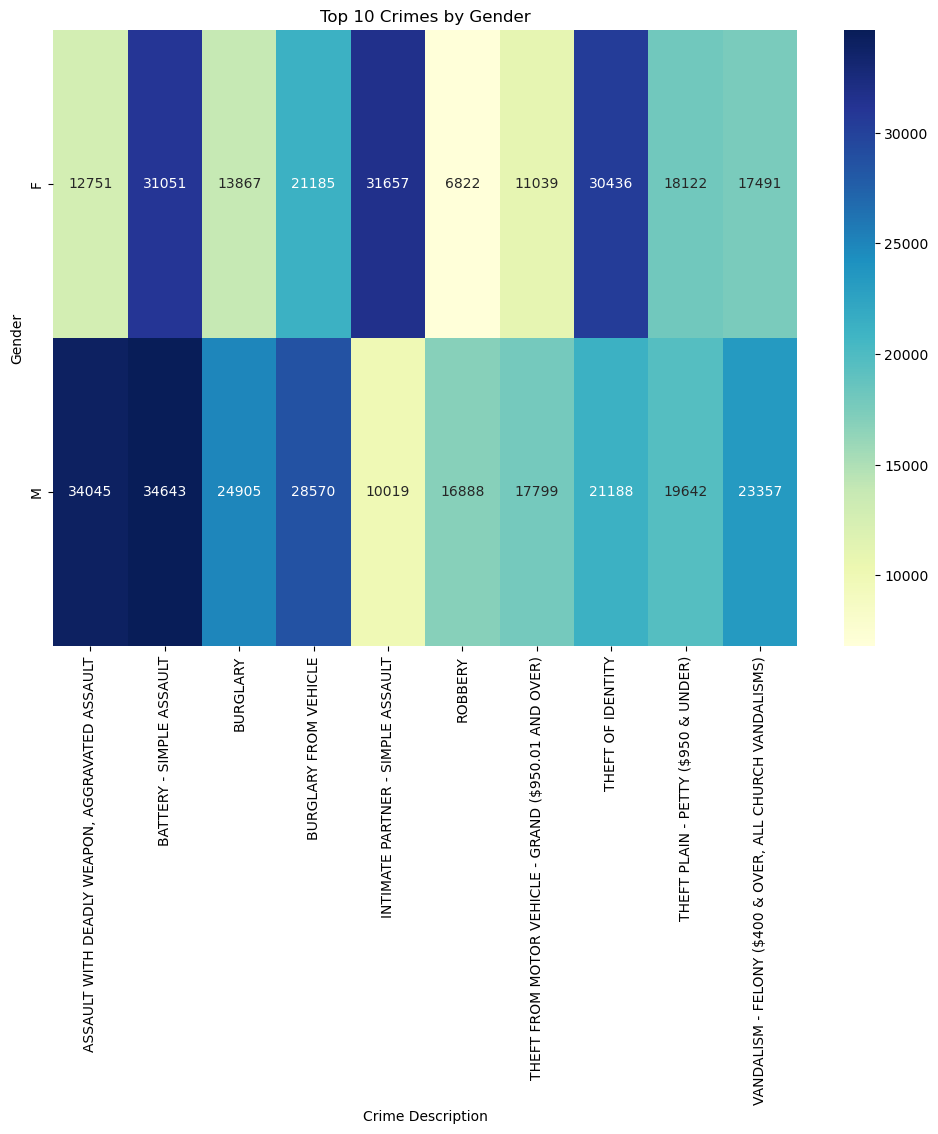

In [29]:
male_female_data = crime_df[crime_df['Vict Sex'].isin(["M","F"])]
# Get top 10 crimes
top_10_crimes = male_female_data['Crm Cd Desc'].value_counts().head(10).index

# Filter data for top 10 crimes
top_10_data = male_female_data[male_female_data['Crm Cd Desc'].isin(top_10_crimes)]

# Group data by gender and selected crimes, count occurrences
grouped_data = top_10_data.groupby(['Vict Sex', 'Crm Cd Desc']).size().unstack().fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Top 10 Crimes by Gender')
plt.xlabel('Crime Description')
plt.ylabel('Gender')
plt.show()

<Figure size 1200x1200 with 0 Axes>

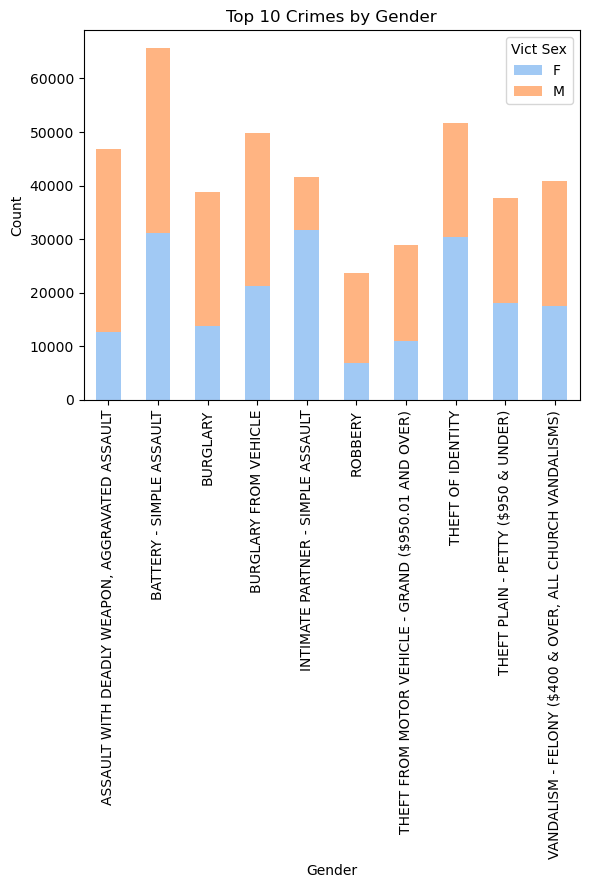

In [30]:
top_10_crimes = male_female_data['Crm Cd Desc'].value_counts().head(10).index

# Filter data for top 10 crimes
male_female_data = male_female_data[male_female_data['Crm Cd Desc'].isin(top_10_crimes)]

# Group data by gender and selected crimes, count occurrences
grouped_data = male_female_data.groupby(['Crm Cd Desc','Vict Sex']).size().unstack().fillna(0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 12))
sns.set_palette("pastel")
ax = grouped_data.plot(kind='bar', stacked=True, rot=0)
plt.title('Top 10 Crimes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Show legend
#plt.legend(title='Crime Description', loc='upper right')
plt.show()

The data presented provides insights into the distribution of crime counts across various crime types and victim sexes. It's worth noting that "Assault with a Deadly Weapon" and "Simple Assault" are the most prevalent offenses, with a greater proportion of female victims. On the other side, "Burglary" and "Burglary from Vehicle" have a disproportionate number of male victims. An noteworthy finding is the increased proportion of female victims in cases of "Intimate Partner - Simple Assault," highlighting the importance of paying attention to such situations. Furthermore, "Theft from Motor Vehicle - Grand" and "Vandalism - Felony" have comparably equal victim numbers of males and females, showing that these crimes have a larger impact on the society. This data emphasizes the necessity of understanding crime patterns and its correlations.

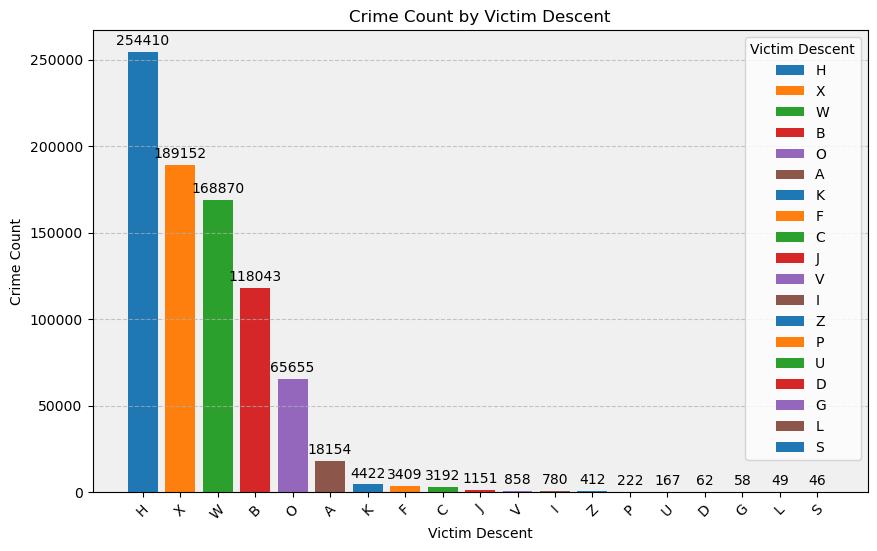

In [31]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Count the number of occurrences for each victim descent category
value_counts = crime_df['Vict Descent'].value_counts()

# Plot the data
bars = plt.bar(value_counts.index, value_counts.values, color=colors)

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.xlabel('Victim Descent')
plt.ylabel('Crime Count')
plt.title('Crime Count by Victim Descent')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if needed

# Customize the chart background and grid
ax.set_facecolor('#f0f0f0')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.7)

# Add a legend for the colors with a smaller font size
legend = plt.legend(bars, value_counts.index, title='Victim Descent', loc='upper right')
for text in legend.get_texts():
    text.set_fontsize(10)  # Set the font size for the legend

plt.show()

The graph shows that the most common victim descent is Hispanic/Latino/Mexican, followed by White, Black, and Other Asian.

The graph also shows that there has been a steady increase in the number of crimes committed against all victim descents over the past five years. However, the rate of increase has been highest for Hispanic/Latino/Mexican victims.

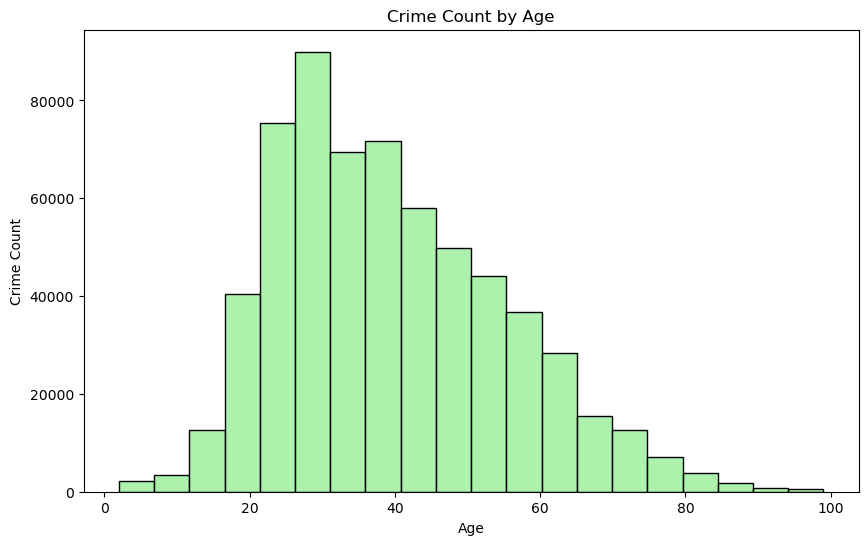

In [32]:
new_df = crime_df[(crime_df['Vict Age'] > 0) & (crime_df['Vict Age'] < 100)]
plt.figure(figsize=(10, 6))
sns.histplot(data=new_df, x='Vict Age', bins=20, color='lightgreen')
plt.xlabel('Age')
plt.ylabel('Crime Count')
plt.title('Crime Count by Age')
plt.show()

The above graph gives information about the crime rates by age. As it is evident from the graph the crime rate is higher among the people between the ages 20-40, with its peak around the age of 28.

## ADVANCED ANALYSIS

In [33]:
df = crime_df.copy()
df = df[df['DATE OCC'] <= pd.to_datetime('2023-10-31')]

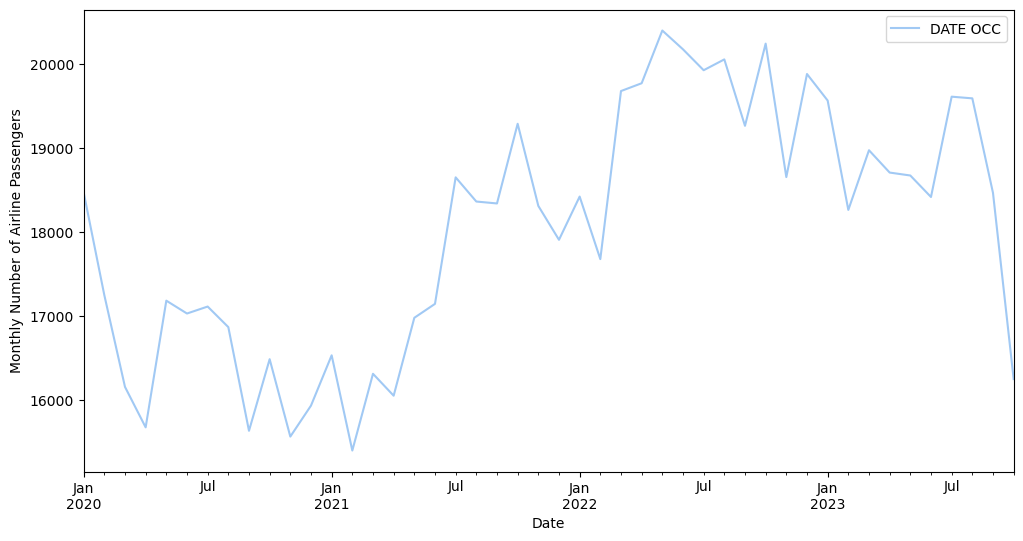

In [34]:
#monthly_counts = df['DATE OCC'].dt.to_period('M').value_counts().sort_index()
month_df = pd.DataFrame(df['DATE OCC'].dt.to_period('M').value_counts().sort_index())
#print(month_df)
ax = month_df.plot(figsize=(12, 6))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [35]:
import statsmodels.api as sm


# Train the SARIMA model
sarima_model = sm.tsa.SARIMAX(month_df['DATE OCC'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Make predictions for the next 4 months (4 time periods into the future)
forecast = sarima_result.get_forecast(steps=10)

# Extract the predicted values and associated confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Print the predicted values and confidence intervals
print("Predicted Values\n")
print(forecast_mean)
print("\nForecast CI\n")
print(forecast_ci)


Predicted Values

2023-11    14505.102707
2023-12    15615.125510
2024-01    15482.512623
2024-02    14258.180511
2024-03    15106.132903
2024-04    14887.687635
2024-05    14921.537422
2024-06    14648.595209
2024-07    15605.022815
2024-08    15616.491911
Freq: M, Name: predicted_mean, dtype: float64

Forecast CI

         lower DATE OCC  upper DATE OCC
2023-11    12613.095799    16397.109615
2023-12    12845.402473    18384.848547
2024-01    12080.737064    18884.288182
2024-02    10315.913743    18200.447280
2024-03    10691.894203    19520.371602
2024-04    10046.325178    19729.050091
2024-05     9688.116235    20154.958608
2024-06     9050.395599    20246.794820
2024-07     9664.439605    21545.606026
2024-08     9352.197438    21880.786385


In [36]:
#change the forecast to dataframe
forecast_df = forecast_mean.reset_index().rename(columns={'index': 'Date','predicted_mean':'Counts'})
forecast_df['Date'] = forecast_df['Date'].astype(str)
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'], format='%Y-%m')

month_df = month_df.reset_index().rename(columns={'index': 'Date','DATE OCC':'Counts'})
month_df['Date'] = month_df['Date'].astype(str)
month_df['Date'] = pd.to_datetime(month_df['Date'], format='%Y-%m')

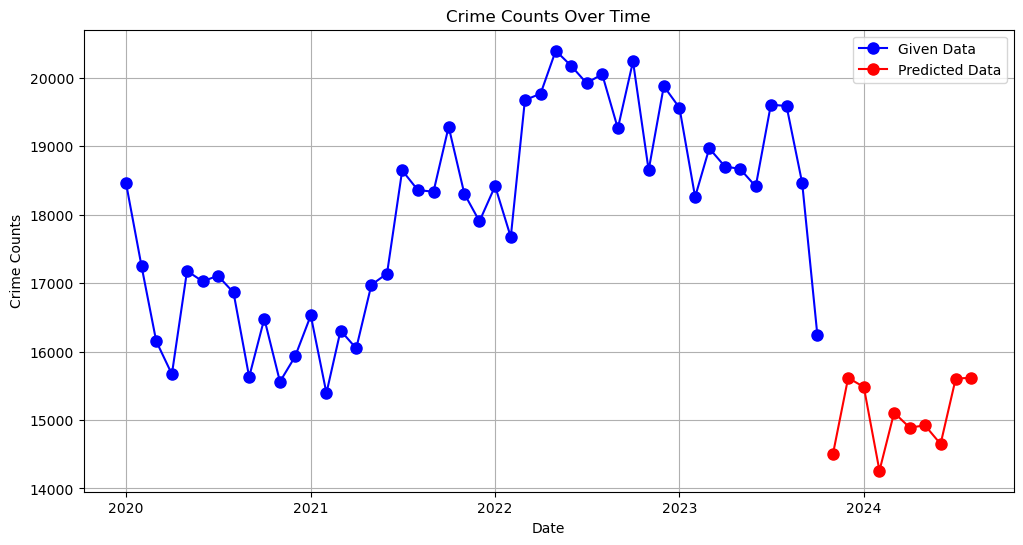

In [37]:
#visualize the above in line trend
plt.figure(figsize=(12, 6))
plt.plot(month_df['Date'], month_df['Counts'], label='Given Data', marker='o', markersize=8, linestyle='-', color='b')
plt.plot(forecast_df['Date'], forecast_df['Counts'], label='Predicted Data', marker='o', markersize=8, linestyle='-', color='r')
plt.title('Crime Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Crime Counts')
plt.legend()
plt.grid(True)

The predicted line is denoted with red color and blue line is used for representing with given data .The graph shows that the number of reported incidents has been decreasing steadily over time, while the predicted incidents have remained relatively flat. This suggests that the measures that have been taken to reduce incidents are having a positive effect. However, it is important to note that the predicted incidents are still relatively high, so there is still room for improvement.